День 1
Сегодня:

— Работа в Google Colab

— Введение в python, pandas

Файл с данными: trips_data.xlsx

https://drive.google.com/file/d/18Hyh1l9H3bR556W1tO2vKwpfAqZPueEp/view

In [7]:
import pandas


In [8]:
trips_data = pandas.read_excel("/content/trips_data.xlsx", index_col=0)

In [10]:
trips_data = pandas.read_excel("/content/trips_data.xlsx", index_col=0)

In [11]:
trips_data.head(3)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney


#Изучим подробнее зарплаты, возраст и предпочтения

In [12]:
trips_data["salary"].describe()

count      1000.000000
mean     111935.000000
std       54580.049073
min           0.000000
25%       68000.000000
50%       99000.000000
75%      161000.000000
max      250000.000000
Name: salary, dtype: float64

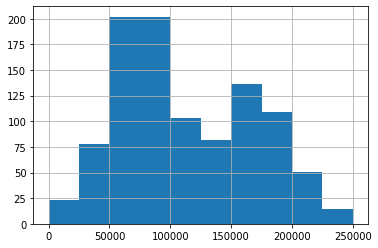

In [13]:
trips_data["salary"].hist()

In [14]:
trips_data["age"].describe()

count    1000.000000
mean       55.209000
std        11.925164
min        18.000000
25%        50.000000
50%        58.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

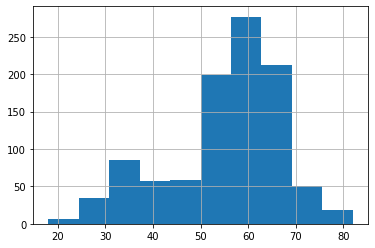

In [15]:
trips_data["age"].hist()

In [16]:
trips_data["city"].value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Ярославль         1
Москва            1
Name: city, dtype: int64

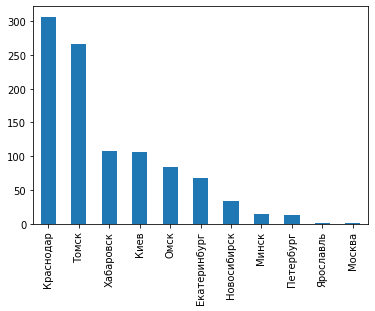

In [17]:
trips_data["city"].value_counts().plot(kind="bar")

In [21]:
trips_data["vacation_preference"].value_counts()

Архитектура      457
Шоппинг          334
Пляжный отдых    208
Ночные клубы       1
Name: vacation_preference, dtype: int64

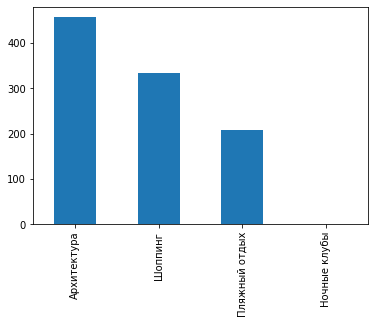

In [18]:
trips_data["vacation_preference"].value_counts().plot(kind="bar")

In [20]:
trips_data["transport_preference"].value_counts()

Самолет                389
Автомобиль             379
Поезд                  148
Морской транспорт       83
Космический корабль      1
Name: transport_preference, dtype: int64

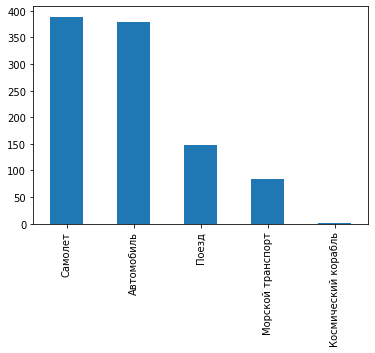

In [19]:
trips_data["transport_preference"].value_counts().plot(kind="bar")

In [22]:
trips_data.groupby(by=["vacation_preference", "target"])["salary"].count()

vacation_preference  target  
Архитектура          London      128
                     New York     81
                     Paris        93
                     Sydney       74
                     Tokio        81
Ночные клубы         New York      1
Пляжный отдых        London       70
                     New York      1
                     Paris        40
                     Sydney       51
                     Tokio        46
Шоппинг              London        1
                     New York    118
                     Paris        70
                     Sydney       73
                     Tokio        72
Name: salary, dtype: int64

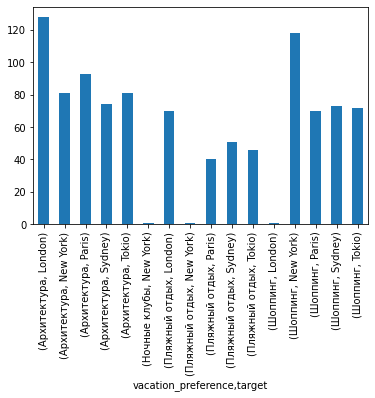

In [24]:
trips_data.groupby(by=["vacation_preference", "target"])["salary"].count().plot(kind="bar")

In [26]:
trips_data.head(10)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney
5,209000,Новосибирск,55,Архитектура,Самолет,2,Tokio
6,59000,Минск,53,Пляжный отдых,Автомобиль,1,London
7,73000,Хабаровск,55,Шоппинг,Поезд,2,New York
8,216000,Томск,75,Шоппинг,Самолет,1,Sydney
9,56000,Киев,60,Шоппинг,Автомобиль,2,New York


#Преобразуем категориальные значения в бинарную систему

In [48]:
df = pandas.get_dummies(trips_data, columns=["city", "vacation_preference", "transport_preference"])
df 
# и теперь исходный  дата фрейм выглядит так:

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,city_Петербург,city_Томск,city_Хабаровск,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81000,55,2,Paris,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
996,96000,32,1,Paris,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
997,56000,68,2,Paris,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
998,162000,69,0,Sydney,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [49]:
X = df.drop("target", axis=1)
y = df["target"]

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression() # настройки
model.fit(X, y)              # обучение модели

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Оцениваем качество модели, насколько хорошо она обучилась?

In [53]:
X.iloc[35]           # на примере данных объекта с id 35 будем строить прогноз по таргету (место назначения) для объекта с id 100

salary                                      188000
age                                             65
family_members                                   1
city_Екатеринбург                                0
city_Киев                                        0
city_Краснодар                                   0
city_Минск                                       0
city_Москва                                      0
city_Новосибирск                                 1
city_Омск                                        0
city_Петербург                                   0
city_Томск                                       0
city_Хабаровск                                   0
city_Ярославль                                   0
vacation_preference_Архитектура                  1
vacation_preference_Ночные клубы                 0
vacation_preference_Пляжный отдых                0
vacation_preference_Шоппинг                      0
transport_preference_Автомобиль                  0
transport_preference_Космически

In [55]:
model.predict([X.iloc[100]])   # запускаем прогноз для объекта с id 100 и видим прогнозе Париж...

array(['Paris'], dtype=object)

In [56]:
y[100]                         # ... тогда как реально объект посетил Сидней. Модель не сработала

'Sydney'

In [34]:
{ col:[0] for col in X.columns }

{'age': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

In [35]:
example = {'age': [31],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [1],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [1],
 'salary': [120000],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [1],
 'vacation_preference_Архитектура': [1],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

example_df = pandas.DataFrame(example)

In [36]:
model.predict(example_df)

array(['New York'], dtype=object)